决策树常用的算法有三类：ID3，C4.5，CART
ID3和C4.5都是基于信息熵来构建的算法（信息越混乱，信息熵越大），C4.5是对ID3的改进，引入信息增益率

CART是根据Gini指数来划分，基尼指数值越大，样本集合的不确定性也越大，这一点与熵相似。

### 以下是对鸢尾花数据集使用CART算法进行分类的操作

In [2]:
import pandas as pd
import numpy as np

In [12]:
iris_data = pd.read_csv('iris.data')
iris_data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
# 对数据进行初步的观测
iris_data.describe()
# 并未出现缺失值

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


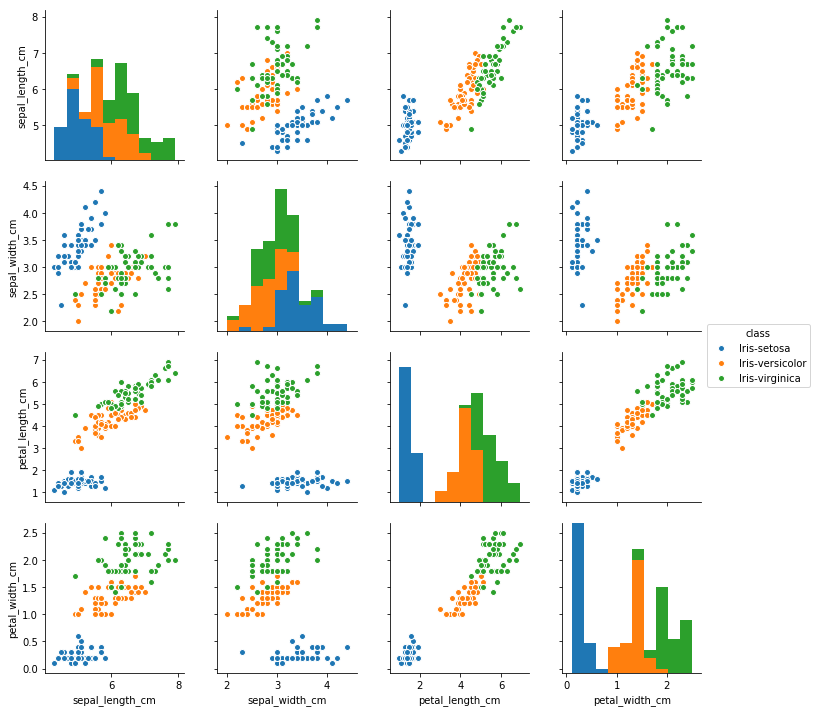

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

# 查看两两特征之间对花品种区分的能力
sb.pairplot(iris_data.dropna(), hue='class')
plt.show()

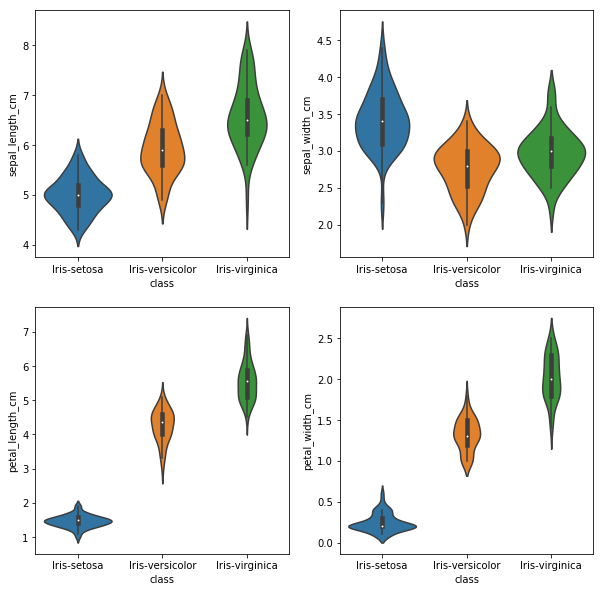

In [24]:
# 设置画板大小
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(iris_data.columns):
    if column == 'class':
        continue
    plt.subplot(2, 2, column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data)

可以观察出一些结论，即不同特征对品种的区分能力，发现petal对花的区分更好，对于数据集中处并没有过分重叠

In [47]:
# 现在划分测试集和训练集
from sklearn.cross_validation import train_test_split

all_input = iris_data.iloc[:, 0:-1].values
all_classes = iris_data['class'].values

(train_inputs, test_inputs, train_classes, test_classes)=\
train_test_split(all_input, all_classes, train_size=0.7, random_state=23)

In [53]:
# 构建决策树模型(分类)，使用CART算法，gini系数
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# 使用刚才分裂的数据构建模型
decision_tree_classifier.fit(train_inputs, train_classes)

# 使用准确率accuracy来评估模型在测试集上的表现
decision_tree_classifier.score(test_inputs, test_classes)
# 得到97%以上的正确率

0.9777777777777777

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


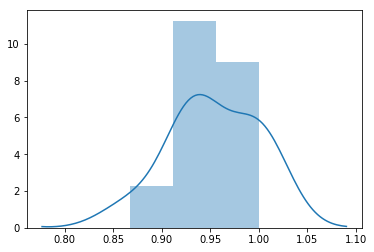

In [57]:
# 使用交叉验证的方法测试之用这几个维度的准确率
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_input, all_classes, cv=10)
cv_scores
# cv_scores是指的每组的准确率

sb.distplot(cv_scores)
# 可以看到准确率都集中在了0.95左右

In [71]:
# 使用gridsearchCV简易调参
# 对决策树深度和参数特征个数做出自动最优选择
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

# 此处一定要和模型中的参数名称一致
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

# 确定交叉验证拆分策略，按照百分比划分
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9731543624161074
Best parameters: {'max_depth': 5, 'max_features': 2}


In [72]:
# 获取最好的模型
decision_tree_classifier = grid_search.best_estimator_


In [74]:
# 最后输出决策树图形
# 使用graphviz
import sklearn.tree as tree

with open('iris.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

# 将dot转换为pdf
# dot -Tpdf iris.dot -o iris.pdf

关于决策树剪枝的方法

- Reduced-Error Pruning(REP,错误率降低剪枝）

- Pesimistic-Error Pruning(PEP,悲观错误剪枝）

- Cost-Complexity Pruning（CCP，代价复杂度剪枝)

- EBP(Error-Based Pruning)（基于错误的剪枝）